# Project:Covid 19 Image Classification

## Importing the necessary libraries

In [1]:
# Importing necessary library
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from glob import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting the google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Loading training and testing folder path
train_dir = "/content/drive/MyDrive/Covid 19 Image classification/Covid 19 image dataset/Covid19-dataset/train"
test_dir = "/content/drive/MyDrive/Covid 19 Image classification/Covid 19 image dataset/Covid19-dataset/test"

In [4]:
# Generate traing and testing data

train_datagen = ImageDataGenerator(rescale=(1./255),
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip = True,
                                   )

test_datagen = ImageDataGenerator(rescale=(1./255),
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip = True,
                                   )


train_set = train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                              batch_size=32,class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_dir, target_size=(224,224),
                                            batch_size=32, class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


## Plotting training images

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline

In [6]:
# Define function to plot training images
def plots(img, figsize=(20,10),rows=4, interp=False, title=None):
  fig = plt.figure(figsize=figsize)
  cols = len(img) // rows if len(img)%2 == 0 else len(img)//rows+1
  for i in range(len(img)):
    sp = fig.add_subplot(rows, cols, i+1)
    sp.axis('off')
    sp.set_title(class_names[title[i].tolist().index(1)], fontsize=16)
    plt.imshow(img[i])


# Making list of classes
class_names = ["Covid", "Normal", "Viral Pneumonia"]

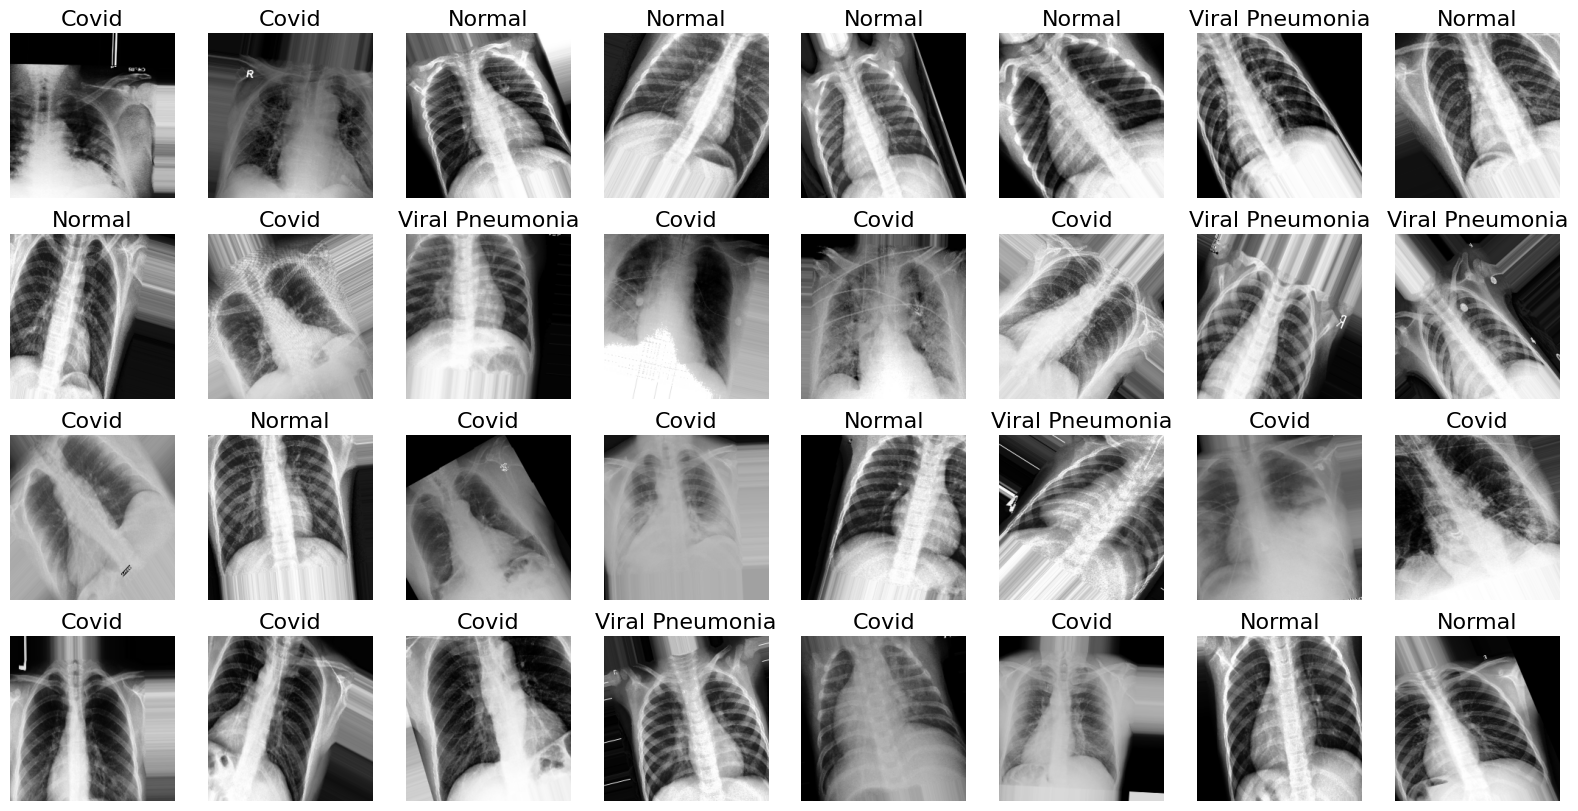

In [8]:
img, labels = next(train_set)
plots(img, title=labels)


### VGG 16 Model

In [9]:
image_size = [224,224]
vgg = VGG16(input_shape= image_size + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
# Dont train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [12]:
# Getting the length of folders
folders = glob("/content/drive/MyDrive/Covid 19 Image classification/Covid 19 image dataset/Covid19-dataset/train/*")
print(len(folders))

3


In [14]:
# VGG16 Architecture
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model16 = Model(inputs=vgg.input, outputs=prediction)

In [15]:
# Model Summary
model16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

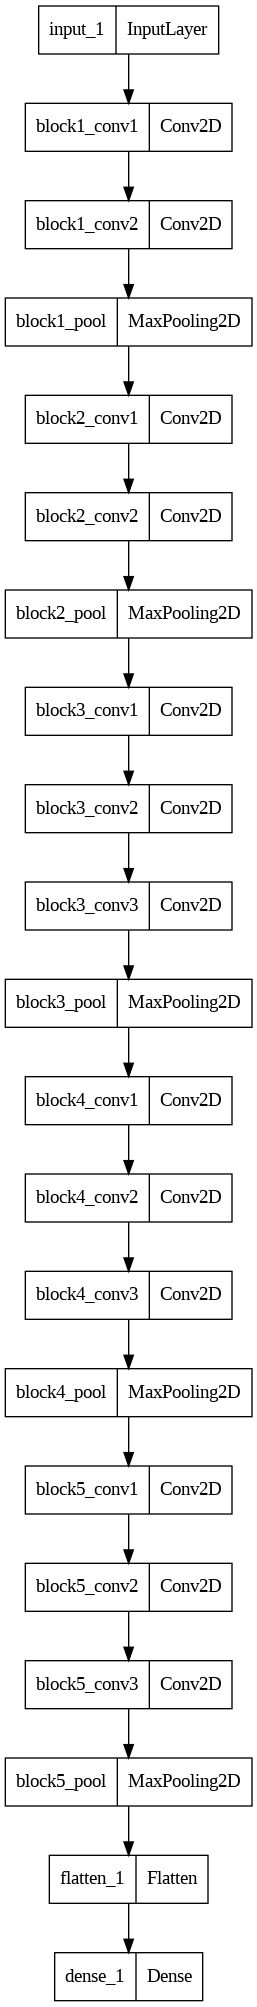

In [16]:
# Plotting graphical representation of model
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.plot_model(model16)

In [17]:
# Compile model
from tensorflow.keras.optimizers import Adam
model16.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [18]:
# Fit(Train) the model
from keras.callbacks import ModelCheckpoint

check = ModelCheckpoint(filepath= 'vgg16model.h5', verbose=1, save_best_only=2)

hist = model16.fit(train_set, epochs=50, 
                   steps_per_epoch=5, 
                   validation_data=test_set, 
                   verbose=2, callbacks=check )

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.27642, saving model to vgg16model.h5
5/5 - 48s - loss: 12.4028 - accuracy: 0.2839 - val_loss: 1.2764 - val_accuracy: 0.6970 - 48s/epoch - 10s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 1.27642
5/5 - 16s - loss: 7.1781 - accuracy: 0.6438 - val_loss: 4.0171 - val_accuracy: 0.6818 - 16s/epoch - 3s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 1.27642
5/5 - 14s - loss: 2.4858 - accuracy: 0.7250 - val_loss: 3.9591 - val_accuracy: 0.6364 - 14s/epoch - 3s/step
Epoch 4/50

Epoch 4: val_loss did not improve from 1.27642
5/5 - 13s - loss: 1.9814 - accuracy: 0.7484 - val_loss: 1.2792 - val_accuracy: 0.7879 - 13s/epoch - 3s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 1.27642
5/5 - 13s - loss: 1.5576 - accuracy: 0.8313 - val_loss: 1.7467 - val_accuracy: 0.7424 - 13s/epoch - 3s/step
Epoch 6/50

Epoch 6: val_loss improved from 1.27642 to 0.58926, saving model to vgg16model.h5
5/5 - 12s - loss: 1.5520 - accuracy: 0

In [19]:
train_result = model16.evaluate(train_set)
print("Train Accuracy & Loss:",train_result)

test_result = model16.evaluate(test_set)
print("Testing Accuracy & Loss",test_result)

8/8 [==============================] - 14s 2s/step - loss: 0.1522 - accuracy: 0.9562
Train Accuracy & Loss: [0.1521943211555481, 0.9561753273010254]
3/3 [==============================] - 3s 585ms/step - loss: 0.1474 - accuracy: 0.9394
Testing Accuracy & Loss [0.14740914106369019, 0.939393937587738]


In [20]:
# Creating dataframe
import pandas as pd
data = pd.DataFrame(zip(train_result, test_result),columns=['Train','Test'],index=['Loss','Accuracy'])
data

,Train,Test
Loss,0.152194,0.147409
Accuracy,0.956175,0.939394


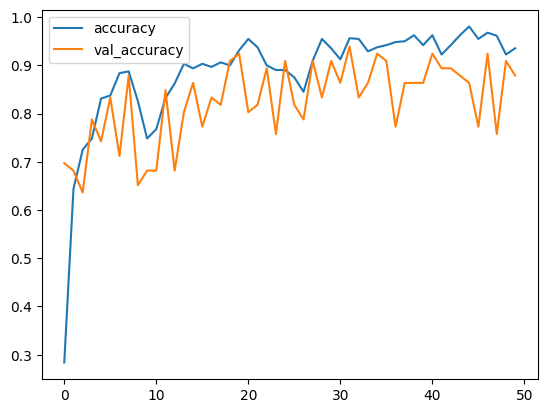

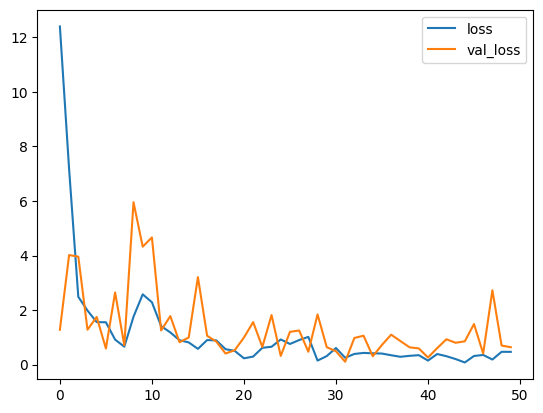

<Figure size 640x480 with 0 Axes>

In [21]:
# Plotting training and testing Accuracy as well as loss & val loss

def plot_curve(hist):
  acc      = hist.history['accuracy']
  val_acc  = hist.history['val_accuracy']
  loss     = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs   = range(len(acc))

  plt.plot(epochs, acc, label='accuracy')
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.legend()
  plt.figure()

plot_curve(hist)

#VGG19 Model


In [22]:
vgg1 = VGG19(input_shape= image_size + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [23]:
# Dont train existing weights
for layer in vgg1.layers:
  layer.trainable = False

In [24]:
# VGG16 Architecture
x = Flatten()(vgg1.output)
prediction = Dense(len(folders), activation='softmax')(x)
model19 = Model(inputs=vgg1.input, outputs=prediction)

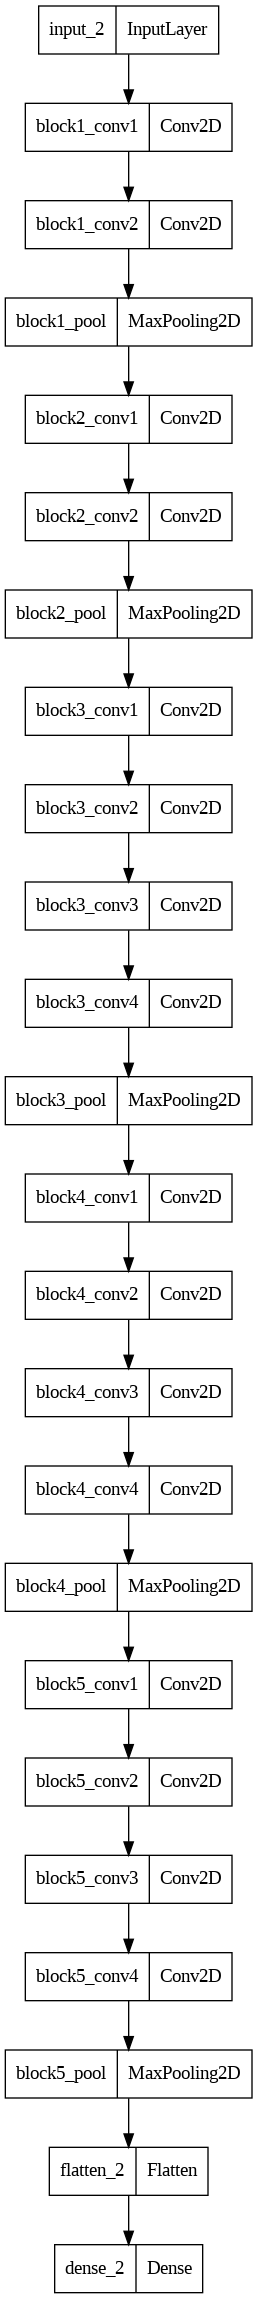

In [25]:
# Plotting graphical representation of model
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.plot_model(model19)


In [26]:
# Model Sumaary
model19.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [27]:
# Compile model
from tensorflow.keras.optimizers import Adam
model19.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [28]:
# Fit(Train) the model
from keras.callbacks import ModelCheckpoint

check = ModelCheckpoint(filepath= 'vgg19model.h5', verbose=1, save_best_only=2)

History = model19.fit_generator(train_set, epochs=40, 
                                steps_per_epoch=5, 
                                validation_data=test_set, 
                                verbose=2, callbacks=check )

Epoch 1/40

Epoch 1: val_loss improved from inf to 11.53132, saving model to vgg19model.h5
5/5 - 15s - loss: 23.1464 - accuracy: 0.3375 - val_loss: 11.5313 - val_accuracy: 0.4091 - 15s/epoch - 3s/step
Epoch 2/40

Epoch 2: val_loss improved from 11.53132 to 10.72954, saving model to vgg19model.h5
5/5 - 13s - loss: 15.9862 - accuracy: 0.4710 - val_loss: 10.7295 - val_accuracy: 0.5455 - 13s/epoch - 3s/step
Epoch 3/40

Epoch 3: val_loss improved from 10.72954 to 8.63822, saving model to vgg19model.h5
5/5 - 13s - loss: 11.0822 - accuracy: 0.5161 - val_loss: 8.6382 - val_accuracy: 0.4545 - 13s/epoch - 3s/step
Epoch 4/40

Epoch 4: val_loss improved from 8.63822 to 1.91324, saving model to vgg19model.h5
5/5 - 13s - loss: 7.3418 - accuracy: 0.5806 - val_loss: 1.9132 - val_accuracy: 0.7424 - 13s/epoch - 3s/step
Epoch 5/40

Epoch 5: val_loss did not improve from 1.91324
5/5 - 12s - loss: 3.5257 - accuracy: 0.7000 - val_loss: 5.4323 - val_accuracy: 0.6515 - 12s/epoch - 2s/step
Epoch 6/40

Epoch 6:

In [29]:
train_result = model19.evaluate(train_set)
print("Train Accuracy & Loss:",train_result)

test_result = model19.evaluate(test_set)
print("Testing Accuracy & Loss",test_result)

8/8 [==============================] - 14s 2s/step - loss: 0.1611 - accuracy: 0.9641
Train Accuracy & Loss: [0.16114503145217896, 0.9641434550285339]
3/3 [==============================] - 2s 607ms/step - loss: 0.3918 - accuracy: 0.9242
Testing Accuracy & Loss [0.391777366399765, 0.9242424368858337]


In [30]:
# Creating dataframe
import pandas as pd
df = pd.DataFrame(zip(train_result, test_result),columns=['Train','Test'],index=['Loss','Accuracy'])
df

,Train,Test
Loss,0.161145,0.391777
Accuracy,0.964143,0.924242


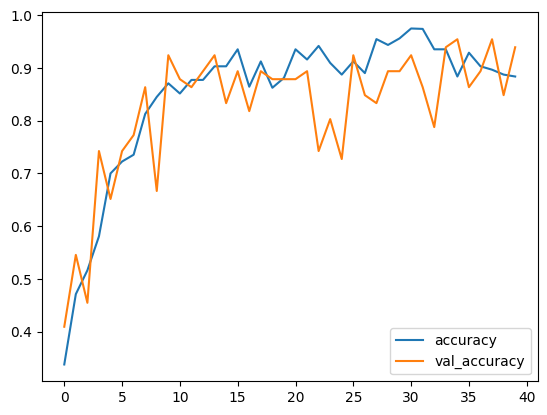

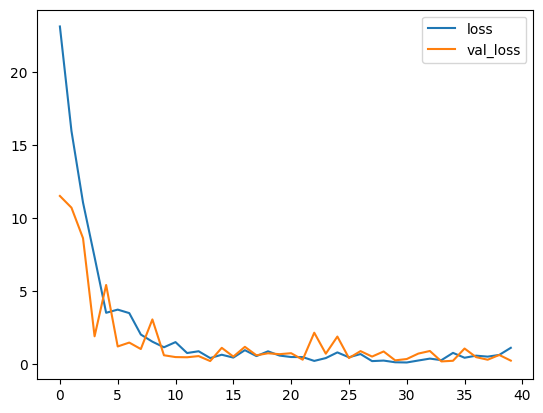

<Figure size 640x480 with 0 Axes>

In [31]:
# Plotting training and testing Accuracy as well as loss & val loss

def plot_curve(hist):
  acc      = History.history['accuracy']
  val_acc  = History.history['val_accuracy']
  loss     = History.history['loss']
  val_loss = History.history['val_loss']
  epochs   = range(len(acc))

  plt.plot(epochs, acc, label='accuracy')
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.legend()
  plt.figure()

plot_curve(hist)